In [2]:
from src.data.data import *
from src.orcml import *
from src.plotting import *
from src.utils.graph_utils import *
from src.isorc import *
from src.utils.embeddings import *
from sklearn.manifold import TSNE
import umap
%load_ext autoreload

exp_params = {
    'mode': 'descent',
    'n_neighbors': 15,
    'epsilon': None,
    'lda': 1e-5,
    'delta': 0.8
}

/home/tristan/envs/isorc/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [45]:
n_points = 4000
noise = 6.2
noise_thresh = 2.2

dataset_info = {
    'name': '3D_swiss_roll',
    'n_points': n_points,
    'noise': noise,
    'noise_thresh': noise_thresh
}

return_dict = swiss_roll(n_points=n_points, noise=noise, noise_thresh=noise_thresh, supersample=True, dim=3, hole=False)
swiss_roll_data, color, cluster, swiss_roll_supersample, subsample_indices = return_dict['data'], return_dict['color'], return_dict['cluster'], return_dict['data_supersample'], return_dict['subsample_indices']

In [46]:
%autoreload 2
orcmanl = ORCManL(
    exp_params=exp_params,
    verbose=True,
    reattach=False,
)
orcmanl.fit(return_dict['data'])

Number of candidate edges: 7537, Number of edges in G': 33359
Shortcut Edge Detected: edge 570
 d_G'(x,y)/effective_eps: 38.88765319854556
 Threshold/effective_eps: 9.97239158264089


Shortcut Edge Detected: edge 1049
 d_G'(x,y)/effective_eps: 39.41519914514193
 Threshold/effective_eps: 9.97239158264089


Shortcut Edge Detected: edge 3198
 d_G'(x,y)/effective_eps: 36.92662819815349
 Threshold/effective_eps: 9.97239158264089


Shortcut Edge Detected: edge 3398
 d_G'(x,y)/effective_eps: 30.493410959401277
 Threshold/effective_eps: 9.97239158264089


Shortcut Edge Detected: edge 3706
 d_G'(x,y)/effective_eps: 24.0281678412025
 Threshold/effective_eps: 9.97239158264089


Shortcut Edge Detected: edge 4599
 d_G'(x,y)/effective_eps: 19.558521229001787
 Threshold/effective_eps: 9.97239158264089


Shortcut Edge Detected: edge 4604
 d_G'(x,y)/effective_eps: 19.79730926807045
 Threshold/effective_eps: 9.97239158264089


Shortcut Edge Detected: edge 5536
 d_G'(x,y)/effective_eps: 25.16841982354828

/home/tristan/envs/isorc/lib/python3.10/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


it: 0, stress 115132983395.6675
it: 1, stress 44921888017.982254
it: 2, stress 40254876183.61194
it: 3, stress 38125272177.556046
it: 4, stress 37188946890.165344
it: 5, stress 36778194736.39475
it: 6, stress 36534848068.13826
it: 7, stress 36324897697.40977
it: 8, stress 36079041170.380844
it: 9, stress 35726009123.131516
it: 10, stress 35173939420.58127
it: 11, stress 34293520093.221622
it: 12, stress 32918782906.7249
it: 13, stress 30888546562.331406
it: 14, stress 28152824502.971096
it: 15, stress 24877390608.345886
it: 16, stress 21402617318.930077
it: 17, stress 18019796275.036922
it: 18, stress 14872804803.463415
it: 19, stress 12058442508.483248
it: 20, stress 9617685384.521832
it: 21, stress 7565281982.644441
it: 22, stress 5918260611.231398
it: 23, stress 4634438667.369073
it: 24, stress 3649599357.3857665
it: 25, stress 2911356591.4609084
it: 26, stress 2368473869.6631303
it: 27, stress 1970593447.8340259
it: 28, stress 1675274168.5621512
it: 29, stress 1455812483.493037
it:

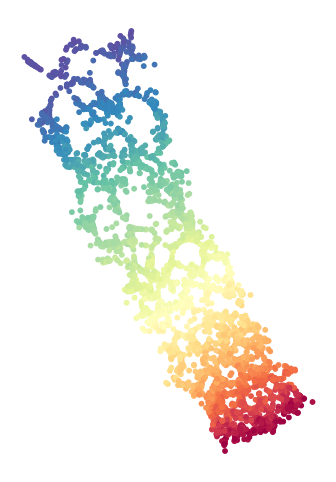

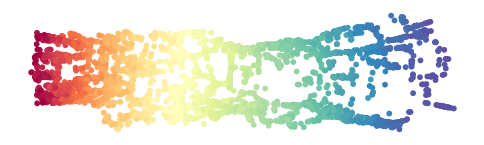

In [75]:
%autoreload 2
from src.isorc import *

isorc = ISORC(
    orcmanl=orcmanl,
    exp_params=exp_params,
    verbose=True,
    temperature=5
)
emb_mds = isorc.fit_MDS(weighted=True)
emb_iso = isorc.fit_isomap(n_components=2)
plot_data_2D(emb_mds, color=color[isorc.G.nodes()], title=None)
plot_data_2D(emb_iso, color=color[isorc.G.nodes()], title=None)

In [76]:
print(isorc.weights)
# plt.hist(isorc.weights.flatten(), bins=100)

[[1.36795498 1.35552903 1.3521146  ... 1.02966788 1.21614722 1.21496785]
 [1.35552903 1.36795498 1.36450926 ... 1.03910671 1.22729548 1.22610531]
 [1.3521146  1.36450926 1.36795498 ... 1.04173072 1.22420406 1.22301688]
 ...
 [1.02966788 1.03910671 1.04173072 ... 1.36795498 0.98784943 0.98880833]
 [1.21614722 1.22729548 1.22420406 ... 0.98784943 1.36795498 1.3666284 ]
 [1.21496785 1.22610531 1.22301688 ... 0.98880833 1.3666284  1.36795498]]


/home/tristan/envs/isorc/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/tristan/envs/isorc/lib/python3.10/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


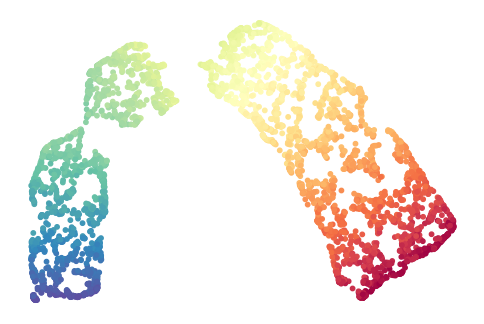

In [5]:
umap_emb = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1).fit_transform(return_dict['data'])
plot_data_2D(umap_emb, color=color, title=None)


In [159]:
%autoreload 2
# quadratics
n_points = 3000
noise = 0.15
noise_thresh = 0.4

return_dict = quadratics(n_points=n_points, noise=noise, noise_thresh=noise_thresh, supersample=True)

In [160]:
orcmanl = ORCManL(
    exp_params=exp_params,
    verbose=True,
    reattach=False
)
orcmanl.fit(return_dict['data'])

Number of candidate edges: 4436, Number of edges in G': 24944
Shortcut Edge Detected: edge 86
 d_G'(x,y)/effective_eps: inf
 Threshold/effective_eps: 9.97239158264089


Shortcut Edge Detected: edge 467
 d_G'(x,y)/effective_eps: inf
 Threshold/effective_eps: 9.97239158264089


Shortcut Edge Detected: edge 484
 d_G'(x,y)/effective_eps: inf
 Threshold/effective_eps: 9.97239158264089


Shortcut Edge Detected: edge 960
 d_G'(x,y)/effective_eps: inf
 Threshold/effective_eps: 9.97239158264089


Shortcut Edge Detected: edge 968
 d_G'(x,y)/effective_eps: inf
 Threshold/effective_eps: 9.97239158264089


Shortcut Edge Detected: edge 3044
 d_G'(x,y)/effective_eps: inf
 Threshold/effective_eps: 9.97239158264089


Shortcut Edge Detected: edge 3048
 d_G'(x,y)/effective_eps: inf
 Threshold/effective_eps: 9.97239158264089


Shortcut Edge Detected: edge 3666
 d_G'(x,y)/effective_eps: inf
 Threshold/effective_eps: 9.97239158264089


Shortcut Edge Detected: edge 3668
 d_G'(x,y)/effective_eps: inf
 Thresho

/home/tristan/envs/isorc/lib/python3.10/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


it: 0, stress 24136529.98033278
it: 1, stress 2105737.6342273406
it: 2, stress 665942.0404177477
it: 3, stress 243242.68906518136
it: 4, stress 114561.9138558373
it: 5, stress 69919.4212306081
it: 6, stress 51700.06912110525
it: 7, stress 43119.59729171172
it: 8, stress 38615.90419282532
it: 9, stress 36058.52163075809
it: 10, stress 34519.81245303932
it: 11, stress 33552.29135628224
it: 12, stress 32922.37136890892
it: 13, stress 32500.455649455613
it: 14, stress 32211.093174194044
it: 15, stress 32008.605141422988
it: 16, stress 31864.41855480772
it: 17, stress 31760.16267006584
it: 18, stress 31683.7447194486
it: 19, stress 31627.040463252073
it: 20, stress 31584.493497084135
it: 21, stress 31552.243102151708
it: 22, stress 31527.568519148404
it: 23, stress 31508.52759787425
it: 24, stress 31493.71759842016
it: 25, stress 31482.1143156311
it: 26, stress 31472.962329472262
it: 27, stress 31465.699164192432
it: 28, stress 31459.90226066927
breaking at iteration 28 with stress 31459.90

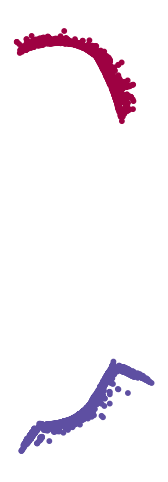

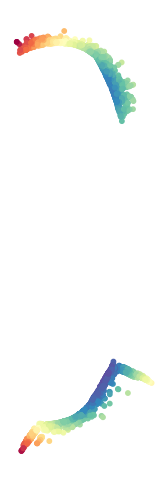

In [161]:
%autoreload 2
from src.isorc import *

isorc = ISORC(
    orcmanl=orcmanl,
    exp_params=exp_params,
    verbose=True,
    temperature=2
)
emb_mds, mw = isorc.fit_MDS(weighted=True, T=1)
# emb_iso = isorc.fit_isomap(n_components=2)
plot_data_2D(emb_mds, color=return_dict['cluster'][isorc.G.nodes()], title=None)
plot_data_2D(emb_mds, color=mw, title=None)
# plot_data_2D(emb_iso, color=return_dict['cluster'][isorc.G.nodes()], title=None)

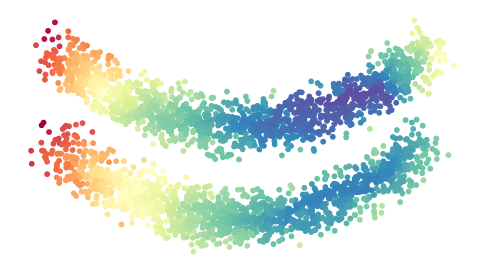

In [162]:
plot_data_2D(return_dict['data'][isorc.G.nodes()], color=mw, title=None)

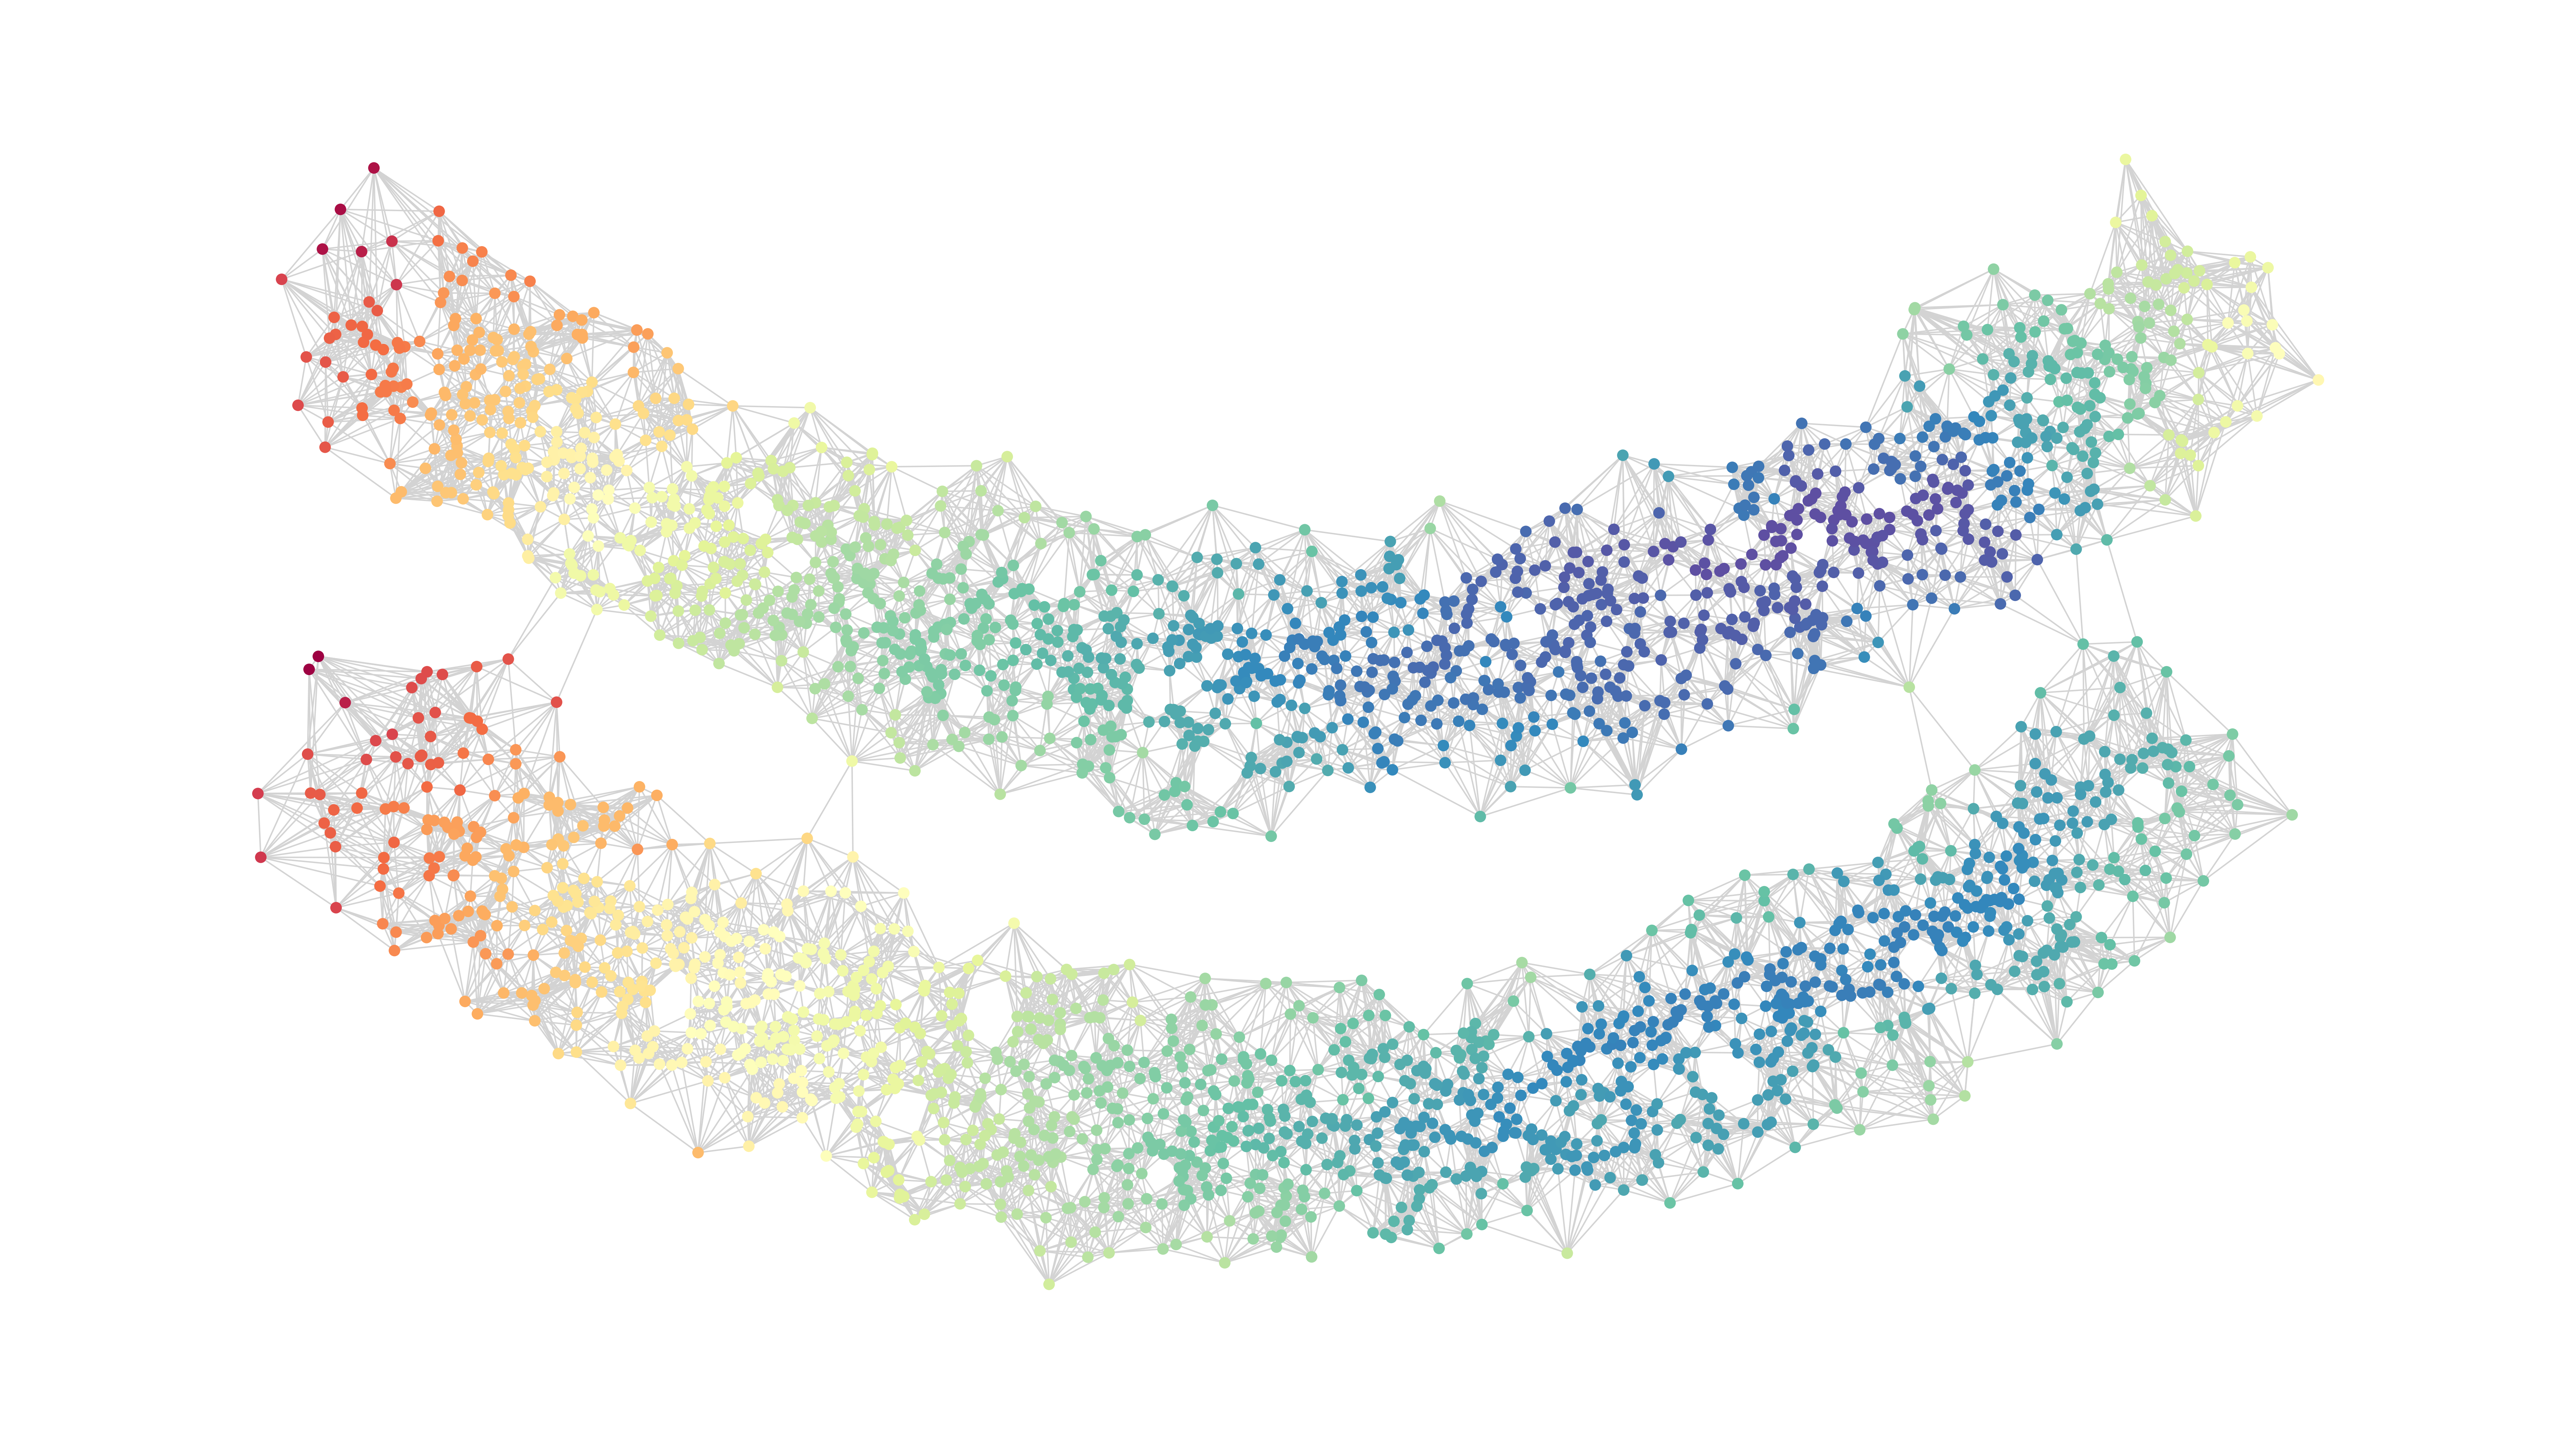

In [164]:
plot_graph_2D(return_dict['data'], isorc.G, node_color=mw, title=None, edge_width=0.25)

/home/tristan/envs/isorc/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


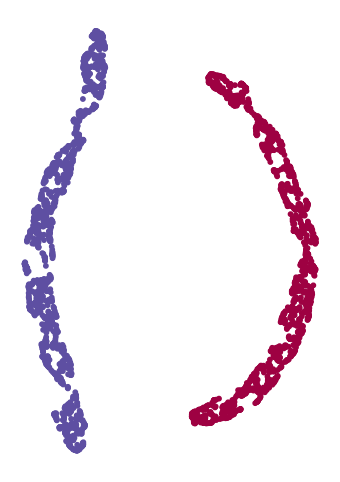

In [163]:
umap_emb = umap.UMAP(n_components=2, n_neighbors=15).fit_transform(return_dict['data'])
plot_data_2D(umap_emb, color=return_dict['cluster'], title=None)

In [3]:
import numpy as np
import torchvision

def get_mnist_data(n_samples, label=None):
    """
    Get n_samples MNIST data points with the specified label. If label is None, get n_samples random data points.
    Parameters:

    n_samples: int
        Number of data points to get
    label: int or None
        Label of the data points to get. If None, get random data points.
    Returns:
    ----------
    mnist_data: np.ndarray
        n_samples x 784 array of MNIST data points
    mnist_labels: np.ndarray
        n_samples array of MNIST labels
    """
    transform = torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Lambda(lambda x: x.view(-1))
    ])
    mnist = torchvision.datasets.MNIST('../data', train=True, download=True, transform=transform)
    mnist_data = torch.stack([x for x, _ in mnist]).numpy().astype(np.float64)
    mnist_labels = torch.tensor([y for _, y in mnist]).numpy().astype(np.float64)
    if label is not None:
        label_indices = np.where(mnist_labels == label)[0]
        np.random.seed(0)
        np.random.shuffle(label_indices)
        label_indices = label_indices[:n_samples]
        mnist_data = mnist_data[label_indices]
        mnist_labels = mnist_labels[label_indices]
    else:
        np.random.seed(0)
        indices = np.random.choice(mnist_data.shape[0], n_samples, replace=False)
        mnist_data = mnist_data[indices]
        mnist_labels = mnist_labels[indices]
    return mnist_data, mnist_labels

# kmnist: path data/KMNIST/t10k-images-idx3-ubyte.gz

def get_kmnist_data(n_samples, label=None):
    """
    Get n_samples KMNIST data points with the specified label. If label is None, get n_samples random data points.
    Parameters:

    n_samples: int
        Number of data points to get
    label: int or None
        Label of the data points to get. If None, get random data points.
    Returns:
    ----------
    kmnist_data: np.ndarray
        n_samples x 784 array of KMNIST data points
    kmnist_labels: np.ndarray
        n_samples array of KMNIST labels
    """
    transform = torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Lambda(lambda x: x.view(-1))
    ])
    kmnist = torchvision.datasets.KMNIST('data', train=True, download=True, transform=transform)
    kmnist_data = torch.stack([x for x, _ in kmnist]).numpy().astype(np.float64)
    # scale so distances are in a reasonable range
    kmnist_labels = torch.tensor([y for _, y in kmnist]).numpy().astype(np.float64)
    if label is not None:
        label_indices = np.where(kmnist_labels == label)[0]
        np.random.seed(0)
        np.random.shuffle(label_indices)
        label_indices = label_indices[:n_samples]
        kmnist_data = kmnist_data[label_indices]
        kmnist_labels = kmnist_labels[label_indices]
    else:
        np.random.seed(0)
        indices = np.random.choice(kmnist_data.shape[0], n_samples, replace=False)
        kmnist_data = kmnist_data[indices]
        kmnist_labels = kmnist_labels[indices]
    return kmnist_data, kmnist_labels

In [61]:
n_samples = 6000
mnist_data, mnist_labels = get_mnist_data(n_samples, label=None)

In [106]:
orcmanl = ORCManL(
    exp_params=exp_params,
    verbose=True,
    reattach=False
)
orcmanl.fit(mnist_data)

Number of candidate edges: 35625, Number of edges in G': 60660
Shortcut Edge Detected: edge 14
 d_G'(x,y)/effective_eps: inf
 Threshold/effective_eps: 318.5369269244976


Shortcut Edge Detected: edge 49
 d_G'(x,y)/effective_eps: inf
 Threshold/effective_eps: 318.5369269244976


Shortcut Edge Detected: edge 50
 d_G'(x,y)/effective_eps: inf
 Threshold/effective_eps: 318.5369269244976


Shortcut Edge Detected: edge 82
 d_G'(x,y)/effective_eps: inf
 Threshold/effective_eps: 318.5369269244976


Shortcut Edge Detected: edge 84
 d_G'(x,y)/effective_eps: inf
 Threshold/effective_eps: 318.5369269244976


Shortcut Edge Detected: edge 134
 d_G'(x,y)/effective_eps: inf
 Threshold/effective_eps: 318.5369269244976


Shortcut Edge Detected: edge 135
 d_G'(x,y)/effective_eps: inf
 Threshold/effective_eps: 318.5369269244976


Shortcut Edge Detected: edge 158
 d_G'(x,y)/effective_eps: inf
 Threshold/effective_eps: 318.5369269244976


Shortcut Edge Detected: edge 164
 d_G'(x,y)/effective_eps: inf
 Thresh

In [119]:
%autoreload 2
from src.isorc import *
isorc = ISORC(
    orcmanl=orcmanl,
    exp_params=exp_params,
    verbose=True,
    uniform=True,
    # temperature=40
)
# emb_mds, mw = isorc.fit_MDS(weighted=True)
# plot_data_2D(emb_mds, color=mnist_labels[isorc.G.nodes()], title=None, node_size=2.5)

/home/tristan/envs/isorc/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/tristan/envs/isorc/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/tristan/envs/isorc/lib/python3.10/site-packages/umap/umap_.py:1865: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")


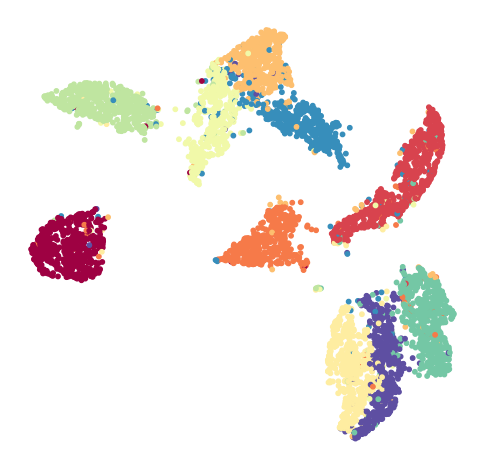

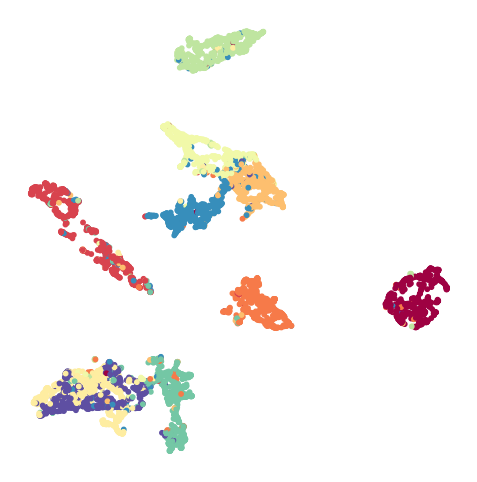

In [120]:
umap_emb = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1).fit_transform(mnist_data)
plot_data_2D(umap_emb, color=mnist_labels, title=None)

# umap on isorc pairwise distances
umap_emb_apsp = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, metric='precomputed').fit_transform(isorc.apsp_energy)
plot_data_2D(umap_emb_apsp, color=mnist_labels[isorc.G.nodes()], title=None)

In [121]:
# knn classifier
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = 5

# original data
knn = KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(mnist_data, mnist_labels)
print(f"Ambient nn accuracy: {knn.score(mnist_data, mnist_labels)}")

# # mds embedding
# mds = manifold.MDS(n_components=2, n_init=1, max_iter=300)
# emb_raw_mds = mds.fit_transform(mnist_data)
# knn = KNeighborsClassifier(n_neighbors=n_neighbors)
# knn.fit(emb_raw_mds, mnist_labels)
# print(f"MDS nn accuracy: {knn.score(emb_raw_mds, mnist_labels)}")

# # isorc + mds embedding
# knn = KNeighborsClassifier(n_neighbors=n_neighbors)
# knn.fit(emb_mds, mnist_labels[isorc.G.nodes()])
# print(f"Isorc+MDS nn accuracy: {knn.score(emb_mds, mnist_labels[isorc.G.nodes()])}")

# isorc pairwise distances
knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric='precomputed')
knn.fit(isorc.apsp_energy, mnist_labels[isorc.G.nodes()])
print(f"Isorc APSP nn accuracy: {knn.score(isorc.apsp_energy, mnist_labels[isorc.G.nodes()])}")

# original graph pairwise distances
knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric='precomputed')
knn.fit(isorc.apsp_euc, mnist_labels[isorc.G.nodes()])
print(f"Euc APSP nn accuracy: {knn.score(isorc.apsp_euc, mnist_labels[isorc.G.nodes()])}")

# umap embedding
knn = KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(umap_emb, mnist_labels)
print(f"UMAP nn accuracy: {knn.score(umap_emb, mnist_labels)}")

# umap on isorc pairwise distances
knn = KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(umap_emb_apsp, mnist_labels[isorc.G.nodes()])
print(f"Isorc APSP + UMAP nn accuracy: {knn.score(umap_emb_apsp, mnist_labels[isorc.G.nodes()])}")

Ambient nn accuracy: 0.9623333333333334
Isorc APSP nn accuracy: 0.9448333333333333
Euc APSP nn accuracy: 0.9715
UMAP nn accuracy: 0.9421666666666667
Isorc APSP + UMAP nn accuracy: 0.9268333333333333


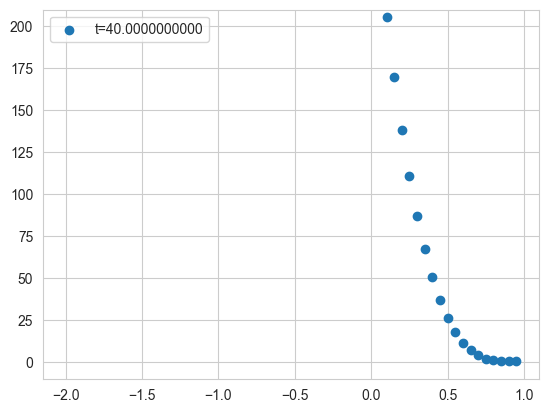

In [122]:
from src.utils.graph_utils import *
%autoreload 2
ts = [40]
# a_array = [0.1]
a = 5e-3
orcs = np.arange(start=-2, stop=1, step=0.05)
plt.figure()
plt.ylim((-10, 210))
for t in ts:
    energies = [energy(orc, d=1, t=t, a=a) for orc in orcs]
    plt.scatter(orcs, energies, label=f't={t:.10f}')
plt.legend()

In [123]:
print(energy(0,d=1,t=1,a=0.1))

292.6


9750 60660


(array([[1.09847808e-03, 8.78782464e-03, 2.41665178e-02, 4.83330355e-02,
         8.12873779e-02, 1.55983887e-01, 2.24089528e-01, 3.16361687e-01,
         4.25111017e-01, 5.41549694e-01, 6.50299024e-01, 7.34881836e-01,
         8.79880942e-01, 9.76547013e-01, 1.00620592e+00, 9.67759189e-01,
         8.57911381e-01, 8.24957038e-01, 6.21738593e-01, 4.63557750e-01,
         3.30641902e-01, 2.25188006e-01, 1.52688453e-01, 9.55675930e-02,
         4.61360794e-02, 3.84467328e-02, 9.88630272e-03, 1.09847808e-03,
         0.00000000e+00, 0.00000000e+00],
        [1.76560522e-04, 1.76560522e-03, 4.41401306e-03, 8.29834455e-03,
         1.48310839e-02, 2.71903204e-02, 4.39635701e-02, 6.40914696e-02,
         9.46364400e-02, 1.33656315e-01, 1.83799504e-01, 2.66606389e-01,
         3.81723849e-01, 5.48573543e-01, 7.22309097e-01, 9.41244144e-01,
         1.12151244e+00, 1.24210327e+00, 1.26982328e+00, 1.11904059e+00,
         9.21645926e-01, 6.69164380e-01, 4.45462198e-01, 2.60250210e-01,
         

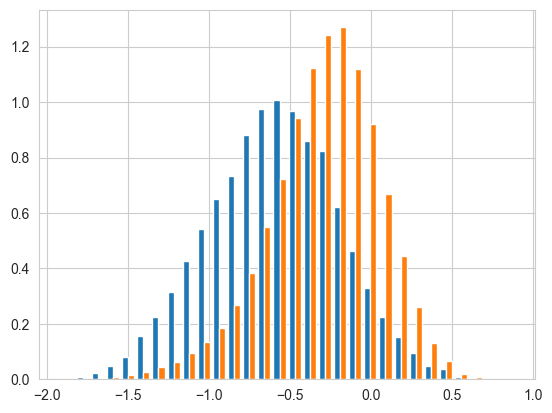

In [124]:
labels_reindexed = mnist_labels
edges = []
for edge in isorc.G.edges():
    if labels_reindexed[edge[0]] != labels_reindexed[edge[1]]:
        edges.append(edge)

print(len(edges), len(isorc.G.edges()))
orcs = [isorc.G.edges[edge]['ricciCurvature'] for edge in edges]

plt.hist([orcs, orcmanl.orcs], bins=30, label=['inter-class edges', 'all edges'], density=True)
# plt.hist(orcmanl.orcs, bins=100, label='all edges')

In [66]:
reversed_indices = np.zeros(len(mnist_labels)).astype(int)
for i, node in enumerate(isorc.G.nodes()):
    reversed_indices[node] = i
plot_graph_2D(emb_mds[reversed_indices], isorc.G, node_color=mnist_labels[isorc.G.nodes()], title=None, edge_width=0.25)

IndexError: index 2026 is out of bounds for axis 0 with size 2000